In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [10]:
df = pd.read_csv("E0.csv")

In [11]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50


In [12]:
df.shape

(380, 65)

In [13]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.597368,1.202632,0.705263,0.510526,14.013158,11.484211,4.813158,3.855263,11.063158,11.657895,...,2.011105,26.563158,-0.328289,2.014895,1.950447,1.988711,1.927500,3.037895,4.324000,5.106605
std,1.306971,1.227862,0.857974,0.753108,5.878033,5.019462,2.817086,2.383452,3.468853,3.556378,...,0.345828,4.810796,0.930087,0.191261,0.173408,0.176265,0.164643,2.211916,1.430417,4.209724
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,3.000000,...,1.460000,17.000000,-2.750000,1.610000,1.560000,1.580000,1.550000,1.120000,3.010000,1.160000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,9.000000,9.000000,...,1.770000,23.000000,-1.000000,1.880000,1.827500,1.870000,1.820000,1.650000,3.400000,2.305000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,3.000000,11.000000,12.000000,...,1.970000,26.000000,-0.250000,1.990000,1.930000,1.980000,1.930000,2.230000,3.765000,3.580000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,13.000000,14.000000,...,2.162500,30.000000,0.250000,2.110000,2.050000,2.110000,2.040000,3.392500,4.602500,5.955000
max,6.000000,7.000000,4.000000,4.000000,37.000000,29.000000,17.000000,15.000000,24.000000,24.000000,...,3.870000,37.000000,1.750000,2.690000,2.500000,2.580000,2.470000,18.000000,12.000000,25.500000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 65 columns):
Div         380 non-null object
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
Referee     380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
B365H       380 non-null float64
B365D       380 non-null float64
B365A       380 non-null float64
BWH         380 non-null float64
BWD         380 non-null float64
BWA       

In [20]:
df.isnull().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
BWH         0
BWD         0
BWA         0
IWH         0
           ..
PSH         0
PSD         0
PSA         0
WHH         0
WHD         0
WHA         0
VCH         0
VCD         0
VCA         0
Bb1X2       0
BbMxH       0
BbAvH       0
BbMxD       0
BbAvD       0
BbMxA       0
BbAvA       0
BbOU        0
BbMx>2.5    0
BbAv>2.5    0
BbMx<2.5    0
BbAv<2.5    0
BbAH        0
BbAHh       0
BbMxAHH     0
BbAvAHH     0
BbMxAHA     0
BbAvAHA     0
PSCH        0
PSCD        0
PSCA        0
Length: 65, dtype: int64

In [26]:
import pandas_profiling as pp

In [28]:
pp.ProfileReport(df)

Number of variables,65
Number of observations,380
Total Missing (%),0.0%
Total size in memory,193.0 KiB
Average record size in memory,520.2 B
Numeric,26
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,32


In [48]:
df_Ars=df.loc[(df['HomeTeam'] == "Arsenal") | (df['AwayTeam'] <= "Arsenal")]

In [42]:
df['Date_new'] = pd.to_datetime(df.Date)

In [43]:
df['Date_Month'] = df['Date_new'].dt.month

In [46]:
df[['Date_new', 'Date_Month']].head()

,Date_new,Date_Month
0,2016-08-13,8
1,2016-08-13,8
2,2016-08-13,8
3,2016-08-13,8
4,2016-08-13,8


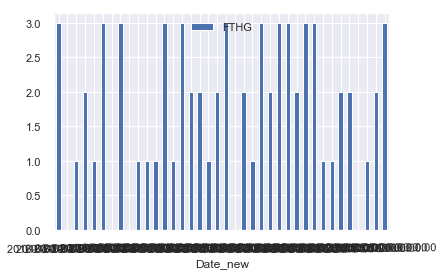

In [71]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = df_Ars.plot.bar(x='Date_new', y='FTHG', rot=1)

In [49]:
df_Ars.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Date_new,Date_Month
7,E0,14/08/16,Arsenal,Liverpool,3,4,A,1,1,D,...,-0.50,2.41,2.31,1.81,1.64,2.80,3.44,2.68,2016-08-14,8
12,E0,20/08/16,Leicester,Arsenal,0,0,D,0,0,D,...,0.25,1.83,1.78,2.15,2.10,2.82,3.50,2.63,2016-08-20,8
27,E0,27/08/16,Watford,Arsenal,1,3,A,0,3,A,...,1.00,1.72,1.67,2.34,2.24,6.00,4.16,1.63,2016-08-27,8
30,E0,10/09/16,Arsenal,Southampton,2,1,H,1,1,D,...,-1.00,2.00,1.95,1.96,1.90,1.63,4.17,6.05,2016-10-09,10
42,E0,17/09/16,Hull,Arsenal,1,4,A,0,1,A,...,1.00,1.89,1.85,2.07,2.00,6.12,4.19,1.62,2016-09-17,9


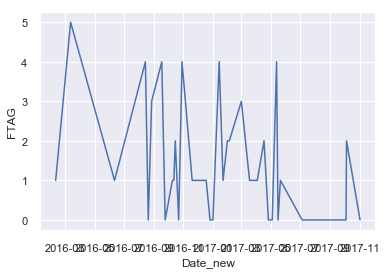

In [84]:
sns.lineplot(x="Date_new", y="FTAG",size_order=25, markers=True,dashes=False,ci=200,n_boot=2000, data=df_Ars)

In [57]:
df_Ars.FTHG.plot('box')

In [58]:
plt.show()

C:\Users\VINOTH S\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\VINOTH S\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\VINOTH S\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [69]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

In [63]:
sudo apt-get install tcl-dev tk-dev python-tk python3-tk

SyntaxError: invalid syntax (<ipython-input-63-d392e1656031>, line 1)

In [66]:
import matplotlib
print(matplotlib.__version__)

3.0.3


In [67]:
%matplotlib inline

In [86]:
np.where(df_Ars['HomeTeam'].isin(['Arsenal']))

(array([ 0,  3,  5,  7,  8, 10, 12, 14, 17, 18, 21, 22, 24, 27, 28, 31, 33,
        36, 37], dtype=int64),)

In [110]:
df_Ars[df_Ars['HomeTeam'].isin(['Arsenal'])].iloc[:]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Date_new,Date_Month,Ars_goal
7,E0,14/08/16,Arsenal,Liverpool,3,4,A,1,1,D,...,2.41,2.31,1.81,1.64,2.80,3.44,2.68,2016-08-14,8,4.0
30,E0,10/09/16,Arsenal,Southampton,2,1,H,1,1,D,...,2.00,1.95,1.96,1.90,1.63,4.17,6.05,2016-10-09,10,1.0
50,E0,24/09/16,Arsenal,Chelsea,3,0,H,3,0,H,...,2.05,2.00,1.92,1.86,2.48,3.49,3.02,2016-09-24,9,0.0
70,E0,15/10/16,Arsenal,Swansea,3,2,H,2,1,H,...,2.38,2.28,1.69,1.65,1.24,7.00,14.50,2016-10-15,10,2.0
80,E0,22/10/16,Arsenal,Middlesbrough,0,0,D,0,0,D,...,2.44,2.30,1.68,1.64,1.27,6.30,13.00,2016-10-22,10,0.0
105,E0,06/11/16,Arsenal,Tottenham,1,1,D,1,0,H,...,1.71,1.67,2.35,2.25,1.97,3.63,4.20,2016-06-11,6,1.0
126,E0,27/11/16,Arsenal,Bournemouth,3,1,H,1,1,D,...,1.71,1.64,2.38,2.28,1.34,5.64,10.10,2016-11-27,11,1.0
140,E0,10/12/16,Arsenal,Stoke,3,1,H,1,1,D,...,2.08,1.99,1.90,1.86,1.32,6.00,10.50,2016-10-12,10,1.0
170,E0,26/12/16,Arsenal,West Brom,1,0,H,0,0,D,...,2.04,1.96,1.95,1.88,1.35,5.55,10.25,2016-12-26,12,0.0
188,E0,01/01/17,Arsenal,Crystal Palace,2,0,H,1,0,H,...,1.98,1.92,1.99,1.93,1.37,5.50,9.20,2017-01-01,1,0.0


In [121]:
df_Ars['Ars_goal_H']=df_Ars[df_Ars['HomeTeam'].isin(['Arsenal'])].iloc[:,4]

C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
df_Ars[df_Ars['HomeTeam'].isin(['Arsenal'])].iloc[:,4]

7      3
30     2
50     3
70     3
80     0
105    1
126    3
140    3
170    1
188    2
217    2
220    1
240    2
291    2
297    3
330    1
351    2
366    2
370    3
Name: FTHG, dtype: int64

In [122]:
df_Ars['Ars_goal_A']=df_Ars[df_Ars['AwayTeam'].isin(['Arsenal'])].iloc[:,5]

C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
df_Ars[df_Ars['AwayTeam'].isin(['Arsenal'])].iloc[:,5]

12     0
27     3
42     4
66     1
93     4
112    1
136    5
151    1
167    1
196    3
204    4
230    1
259    1
278    1
312    0
322    2
342    0
354    2
360    4
Name: FTAG, dtype: int64

In [127]:
df_Ars['Ars_goal_H'].head()

7     3.0
12    NaN
27    NaN
30    2.0
42    NaN
Name: Ars_goal_H, dtype: float64

In [128]:
df_Ars['Ars_goal']=df_Ars['Ars_goal_H'].fillna(df_Ars['Ars_goal_A'])

C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
df_Ars['Ars_goal'].head()

7     3.0
12    0.0
27    3.0
30    2.0
42    4.0
Name: Ars_goal, dtype: float64

(array([736024., 736085., 736146., 736208., 736269., 736330., 736389.,
        736450., 736511., 736573., 736634.]),
 <a list of 11 Text xticklabel objects>)

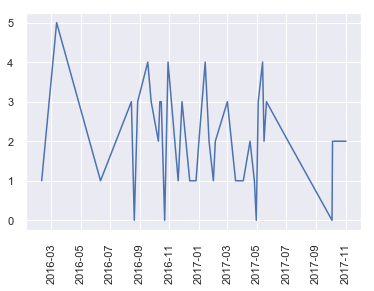

In [161]:
df_Ars = df_Ars.sort_values('Date_new', ascending=True)
plt.plot(df_Ars['Date_new'], df_Ars['Ars_goal'])
plt.xticks(rotation='vertical')

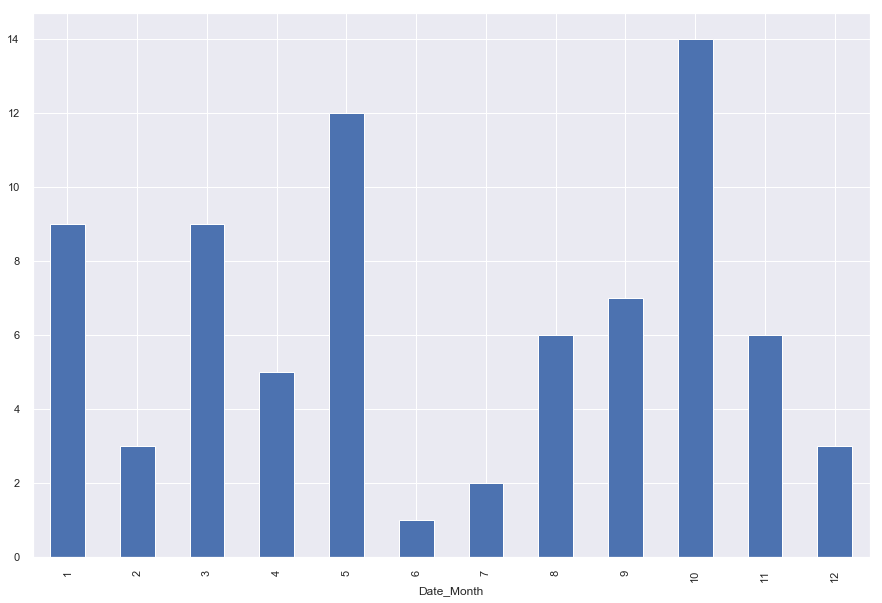

In [156]:
df_Ars1 = df_Ars.groupby(['Date_Month'])['Ars_goal'].sum()

df_Ars1.plot.bar(figsize=(15, 10))

In [148]:
df_Ars[df_Ars['HomeTeam'].isin(['Arsenal'])].iloc[:,-3].mean()

2.0526315789473686

In [149]:
df_Ars[df_Ars['AwayTeam'].isin(['Arsenal'])].iloc[:,-3].mean()

2.0

In [155]:
df['HC'].corr(df['AC'])

-0.29572422767592293

In [157]:
df['HC'].describe()

count    380.000000
mean       5.678947
std        3.084916
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       19.000000
Name: HC, dtype: float64

In [158]:
df['AC'].describe()

count    380.000000
mean       4.734211
std        2.702562
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       15.000000
Name: AC, dtype: float64